# ![title](title_IAP_ALA.png)

**AUTORES:**
- Ian Mascaro Salomão - DRE: *123162270*
- Vinícius Leoni Gonçalves - DRE: *121083446*

**BEM VINDO, TREINADOR!**
***
Este é o Gerador de Índice de Afinidade Pokémon (IAP)!
O objetivo deste gerador é auxiliar treinadores a identificar os cinco Pokémon com os status base mais semelhantes ao do Pokémon de interesse. O cálculo considera tanto a distribuição dos valores entre os diferentes status quanto a magnitude absoluta de cada um.

**APLICABILIDADES REAIS!**
- Útil para o treinador que perdeu um de seus companheiros no meio da jornada rumo ao topo de Kanto, o Gerador procura dentre todas as espécies de Pokémon aquelas que têm o perfil mais parecido com o amigo que se foi. Assim, o treinador pode continuar a batalhar com um time que mantenha sua identidade. 
- Pode ser usado também para substituir um companheiro que tenha desvantagem por causa do seu tipo em uma luta de Ginásio.

## **Instalando os pacotes necessários**
    Antes de utilizar este notebook lembre de baixar o Julia e o Jupyter corretamente em sua máquina


In [12]:
#Execute este bloco de código apenas uma vez
#Galo!!!
#FLU!!!
using Pkg

Pkg.add("HTTP")
Pkg.add("JSON")
Pkg.add("LinearAlgebra")
Pkg.add("IJulia")
Pkg.add("PlotlyJS")

   Resolving package versions...
  No Changes to `C:\Users\Gorguet\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Gorguet\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Gorguet\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Gorguet\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Gorguet\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Gorguet\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Gorguet\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Gorguet\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Gorguet\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Gorguet\.julia\environments\v1.11\Manifest.toml`


## Usando a PokeAPI
***
Vamos aprender a utilizar a PokeAPI. Essa API contém as informações de todos os Pokemóns. Para o nosso projeto, usaremos apenas a 1° Geração. 
Vamos extrair os nomes e status base dos Pokémons para poder gerar a métrica criada por nós; o **Índice de Afinidade Pokémon (IAP)**.

No exemplo abaixo, extraímos os dados dos Pokémons Pikachu e Charmander, utilizando as urls diretamente por seus nomes.


In [5]:
#Usando a PokeAPI 
using HTTP, JSON

# URL da PokeAPI para buscar dados do Pikachu
url = "https://pokeapi.co/api/v2/pokemon/pikachu"
# URL DA PokeAPI para buscar dados do Charmander
url2 = "https://pokeapi.co/api/v2/pokemon/charmander"

# Fazer a requisição GET
response = HTTP.get(url)
response_2 = HTTP.get(url2)

# Parse do conteúdo JSON
data = JSON.parse(String(response.body))
data_2 = JSON.parse(String(response_2.body))

datas = [data, data_2]

# Exibir informações sobre o Pikachu
for x in datas
    println("Nome: ", x["name"])
    println("Altura: ", x["height"])
    println("Peso: ", x["weight"])
    println("Habilidades: ", [h["ability"]["name"] for h in x["abilities"]])

    for h in x["stats"]
        println("Status: ", h["stat"]["name"], " -> Valor Base: ", h["base_stat"])
    end
    
    
end


Nome: pikachu
Altura: 4
Peso: 60
Habilidades: ["static", "lightning-rod"]
Status: hp -> Valor Base: 35
Status: attack -> Valor Base: 55
Status: defense -> Valor Base: 40
Status: special-attack -> Valor Base: 50
Status: special-defense -> Valor Base: 50
Status: speed -> Valor Base: 90

Nome: charmander
Altura: 6
Peso: 85
Habilidades: ["blaze", "solar-power"]
Status: hp -> Valor Base: 39
Status: attack -> Valor Base: 52
Status: defense -> Valor Base: 43
Status: special-attack -> Valor Base: 60
Status: special-defense -> Valor Base: 50
Status: speed -> Valor Base: 65



## Capturando da PokeAPI os status de todos os pokemons da 1° Geração em uma matriz
***
No universo de Pokémon em que estamos trabalhando, todos Pokémons possuem 6 status base, os quais estaremos interpretando como vetores.

Aqui criaremos nossas matrizes principais. Os nomes dos 151 Pokemóns originais serão armazenados no vetor ***NAMES_VECTOR***, ordenado pelo número do Pokedéx, e o vetor de status de cada um deles será uma coluna da matriz ***STATS_MATRIX***, também ordenada pelo número do Pokedéx.
Assim, garantimos que acessar a posição $i$ do vetor de nomes nos retornará o nome do Pokémon cujo vetor de status é a coluna da posição $i$ da matriz de status.


Notamos que é possível acessar os dados dos pokémons pela API utilizando o código do Pokédex. Como esse código é um número de 1-3 dígitos inteiro que começa em 1 e vai até 151, a consulta se torna iterável.

In [2]:
using HTTP, JSON

#Função para obter informações de um Pokémon por ID
function get_pokemon_data(id::Int)
    url = "https://pokeapi.co/api/v2/pokemon/$id"
    response = HTTP.get(url)
    data = JSON.parse(String(response.body))
    return data
end

function create_pokemon_stats_matrix(qt_pkmn::Int)
    matriz_stats = zeros(6, 0)  #Matriz com 6 linhas e 0 colunas
    vetor_nomes = String[] #Matriz com os nomes dos Pokémons
    
    
    for id in 1:qt_pkmn
        data = get_pokemon_data(id)
        nova_coluna = Int[]
        for h in data["stats"]
            push!(nova_coluna, h["base_stat"]) 
        end

        push!(vetor_nomes, data["name"]) 
        
        matriz_stats = hcat(matriz_stats, nova_coluna)
    end

    return matriz_stats , vetor_nomes
end

MOTHER_MATRIX = create_pokemon_stats_matrix(151)
STATS_MATRIX = MOTHER_MATRIX[1]
NAMES_VECTOR = MOTHER_MATRIX[2]



151-element Vector{String}:
 "bulbasaur"
 "ivysaur"
 "venusaur"
 "charmander"
 "charmeleon"
 "charizard"
 "squirtle"
 "wartortle"
 "blastoise"
 "caterpie"
 ⋮
 "snorlax"
 "articuno"
 "zapdos"
 "moltres"
 "dratini"
 "dragonair"
 "dragonite"
 "mewtwo"
 "mew"

## Definindos Funções de Algebra Linear
***
 Estamos utilizando aqui os conceitos que aprendemos em Algebra Linear Algorítmica para trabalhar com vetores e entender o quão próximos dois vetores estão sob duas métricas - _Distância Angular_ e _Distância Euclidiana_. 
 



   **Calculando a Distância Angular**
  
    A distância angular entre dois vetores u e v é dada pela divisão do produto interno entre eles pelo produto da norma deles. Ou seja: 

   $ D = cos(\theta) = \frac{u \cdot v}{∥u∥\cdot∥v∥} $ 

   **Calculando a Distância Euclidiana**
  
    A distância euclidiana entre dois vetores u e v é dada pela norma de u-v. Ou seja: 

   $ D = \sqrt[]{u-v} $ 

In [3]:
using LinearAlgebra

function cos_calc(v1, v2)

  return (dot(v1,v2)/(norm(v1)*norm(v2)))

end

function euclidian_dist(v1, v2)
  # ||v1-v2||

  return norm(v1-v2)
end

function calc_angle(v1, v2)
  return (((180)/pi)*(acos(cos_calc(v1, v2))))

end

v1 = [1,0,0]
v2 = [0,1,0] #Note que v2 é ortogonal em v1, e são correspondentes ao eixo X e Y em ℝ³

v3 = transpose(v2)

println(v2)
println(v3)

println(euclidian_dist(v1, v2)) #Esperado é raiz quadrada de dois 
println(cos_calc(v1, v2)) #Esperado é 0
println(calc_angle(v1, v2)) #Esperado é 90 graus


[0, 1, 0]
[0 1 0]
1.4142135623730951
0.0
90.0


## Tratando da análise e manipulação dos dados extraídos
***
Agora, vamos implementar as funções do nosso código que relacionarão a Algebra Linear com os Pokémon. 
Essa parte do projeto implementa funções para:
 
- Obter vetores de status pelo número do Pokédex
- Obter vetores de status pelo número do Pokédex
- Buscar pokemóns pelo número do Pokédex
- Buscar pokemóns pelo número do Pokédex,
- Obter o número do Pokédex pelo nome do Pokémon
- Calcular a proximidade de dado Pokemón entre os outros
- Organizar o vetor onde as proximidades foram armazenadas,
- Encontrar os Pokémons extremos.

Todas essas funções são auxiliares para que possamos alcançar o objetivo do projeto, que é recomendar os 5 Pokémons mais próximos ao Pokémon indicado pelo usuário. 

**EXPLICANDO O CÁLCULO DO ÍNDICE DE AFINIDADE POKÉMON (IAP)**

Para o cálculo do **IAP** nós multiplicamos a distância angular e distância euclidiana. Obtemos, assim, um valor que dirá o quão próximo os status de um pokémon  está de outro, tanto pela distribuição dos status, quanto pela magnitude dos valores dos status. Isso evita tanto que o programa indique Pokémons muito fracos mas com uma distribuição similar de status, ou Pokémons próximos em força mas que tenham perfis de status completamente diferentes.

In [4]:
function find_pokemon_stats_by_dex_num(pokemon_ID:: Int)
    pokemon_stats = STATS_MATRIX[:, pokemon_ID] #Obtém o vetor na posição pokemon_ID
    return pokemon_stats
end

function find_pokemon_name_by_dex_num(pokemon_ID:: Int)
    pokemon_name = NAMES_VECTOR[pokemon_ID, :] #Obtém o nome do Pokémon com o pokemon_ID
    return pokemon_name
end

function find_dex_num_by_name(name:: String)
   return findfirst(==(name), NAMES_VECTOR) #Retorna o a posicao do nome no Vetor dos nomes que é o mesmo número na Pokedex
end

function build_pokemon_distances_vector(pokemon_ID:: Int)
    #Mede a distancia entre esse Pokémon com todos os outros, usa a matriz de status dos pokemons
    distances_vector = Float64[] #Matriz das distancias com 1 linha e 0 colunas
    stats_vector = find_pokemon_stats_by_dex_num(pokemon_ID)
    
    for i in 1:151
        if(i == pokemon_ID) continue
        end
            v = STATS_MATRIX[:,i] #Extrair vetor Pokémon da matriz de status dos pokemons
            push!(distances_vector, (cos_calc(stats_vector, v)*euclidian_dist(stats_vector, v))) #Inserir distancia na matriz de distancias
        
    end
    return distances_vector
end 

function delete_name_from_vector(pokemon_ID:: Int, names_vector)
    deleteat!(names_vector, pokemon_ID) #Remove o nome do Pokémon do vetor de nomes
end

function sort_distances(distances_vector,names_vector) #Organiza o vetor de distâncias por BubbleSort
    troca = true
    
    while troca
        troca = false
        for i in 1:149
            if distances_vector[i] > distances_vector[i+1]
                # Troca os elementos no vetor de distâncias
                distances_vector[i], distances_vector[i+1] = distances_vector[i+1], distances_vector[i]
                # Troca os elementos no vetor de nomes
                names_vector[i], names_vector[i+1] = names_vector[i+1], names_vector[i]
                troca = true
            end
        end
    end
    return distances_vector[1:5], names_vector[1:5]
end

function acha_mais_distante() #Encontra o Pokémon com maior média de distância para os 5 mais próximos, o Pokémon mais "excêntrico"
    media = 0
    maior_media = 0
    pokemon_dist = nothing
    for pokemon in NAMES_VECTOR
        media = sum(find_5_pokemon_alike(pokemon)[1])/5
        if(media > maior_media)
            maior_media = media
            pokemon_dist = pokemon 
        end
    end

    return pokemon_dist
end 

function acha_mais_próximo() #Encontra o Pokémon com menor média de distância para os 5 mais próximos, o Pokémon mais "genérico"
    media = 0
    maior_media = 10000
    pokemon_dist = nothing
    for pokemon in NAMES_VECTOR
        media = sum(find_5_pokemon_alike(pokemon)[1])/5
        if(media < maior_media)
            maior_media = media
            pokemon_dist = pokemon 
        end
    end

    return pokemon_dist
end 

function find_5_pokemon_alike(name:: String)
    this_dex_num = find_dex_num_by_name(name)

    aux_names_vector = copy(NAMES_VECTOR)
    delete_name_from_vector(this_dex_num, aux_names_vector)

    this_distances_vector = build_pokemon_distances_vector(this_dex_num)
    sort_distances(this_distances_vector, aux_names_vector)
    return this_distances_vector[1:5], aux_names_vector[1:5], name
end

find_5_pokemon_alike (generic function with 1 method)

In [6]:
#Calculando o Índice de Afinidade Pokémon (IAP) 

teste1 = find_5_pokemon_alike("scyther")
teste2 = find_5_pokemon_alike("rapidash")
teste3 = find_5_pokemon_alike("venusaur")
most_excentric = acha_mais_distante()
most_generic = acha_mais_próximo()

most_excentric_dist = find_5_pokemon_alike(most_excentric)
most_generic_dist = find_5_pokemon_alike(most_generic)
println("Entrada 1: ", teste1[3])
print("Os 5 mais próximos deste pokemon são: ") 
println(teste1[2])
print("Com respectivo score de:")
println(teste1[1])
println("\nEntrada 2: ", teste2[3])
println("Entrada 3: ", teste3[3], "\n")
println(most_excentric_dist[3], " é o pokémon mais excêntrico com IAPs mais próximos sendo: ", most_excentric_dist[1], "\ne\n", most_generic_dist[3], " é o pokémon mais genérico com IAPs mais próximos sendo: ", most_generic_dist[1])

Entrada 1: scyther
Os 5 mais próximos deste pokemon são: ["dodrio", "primeape", "tauros", "rapidash", "aerodactyl"]
Com respectivo score de:[25.325408527316416, 25.874726914612243, 26.24550369807204, 28.870809777672637, 31.686552318730808]

Entrada 2: rapidash
Entrada 3: venusaur

chansey é o pokémon mais excêntrico com IAPs mais próximos sendo: [90.67999253817123, 97.60210349561514, 98.55292622391164, 99.36489657519904, 104.11589457686831]
e
ditto é o pokémon mais genérico com IAPs mais próximos sendo: [15.457282052582125, 16.60112748800147, 17.70658757436876, 17.87641098752202, 18.920534723362]


## Exibindo os resultados em um gráfico
***
Com os resultados calculados, vamos interpretar em um mapa de calor a distância dos Pokémons sugeridos para o Pokémon selecionado. Os gráficos foram gerados utilizando a biblioteca PlotlyJS. 

In [7]:
function plot_graphic(distances_vector, names_vector, pokemon_name)
    
    images = [
        Dict("source" => "https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/$(find_dex_num_by_name(names_vector[1])).png",
                "xref" => "x", "yref" => "y", "x" => 0, "y" => 0, "sizex" => 1.35, "sizey" => 1.35, "xanchor" => "center", "yanchor" => "middle"),
        Dict("source" => "https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/$(find_dex_num_by_name(names_vector[2])).png",
                "xref" => "x", "yref" => "y", "x" => 1, "y" => 0, "sizex" => 1.35, "sizey" => 1.35, "xanchor" => "center", "yanchor" => "middle"),
        Dict("source" => "https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/$(find_dex_num_by_name(names_vector[3])).png",
                "xref" => "x", "yref" => "y", "x" => 2, "y" => 0, "sizex" => 1.35, "sizey" => 1.35, "xanchor" => "center", "yanchor" => "middle"),
        Dict("source" => "https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/$(find_dex_num_by_name(names_vector[4])).png",
                "xref" => "x", "yref" => "y", "x" => 3, "y" => 0, "sizex" => 1.35, "sizey" => 1.35, "xanchor" => "center", "yanchor" => "middle"),
        Dict("source" => "https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/$(find_dex_num_by_name(names_vector[5])).png",
                "xref" => "x", "yref" => "y", "x" => 4, "y" => 0, "sizex" => 1.35, "sizey" => 1.35, "xanchor" => "center", "yanchor" => "middle")
    ]


    annotations = []
        for (i, value) in enumerate(distances_vector)
        push!(annotations, Dict(
            "x" => i - 1, 
            "y" => 0.35,  
            "xref" => "x",
            "yref" => "y",
            "text" => string(round(value, digits = 4)),
            "showarrow" => false,
            "yshift" => 20,  
            "font" => Dict("color" => "black", "size" => 14)
            ))
        end

    PlotlyJS.plot(
        PlotlyJS.heatmap(
            x=["1º $(names_vector[1])", "2º $(names_vector[2])", "3º $(names_vector[3])", "4º $(names_vector[4])", "5º $(names_vector[5])"],
            y=[""],
            z=transpose(distances_vector),
            zmin=0,
            zmax=100,
            colorscale="Jet",
            showscale=true
        ),

            
        PlotlyJS.Layout(
            images=images,
            annotations=annotations,
            font=attr(family="Arial Black", size=14, color="black"),
            title="Top 5 pokemons com IAP mais próximos de: " * pokemon_name,
            xaxis=attr(side="top", fixedrange=true),
            yaxis=attr(visible=false, fixedrange=true),
            paper_bgcolor="#EBDBAB",
            width=1000,
            height=300,
            margin=attr(t=50, l=50, r=50, b=30),
            autosize=true,
            automargin=true,
            coloraxis_colorbar=attr(title="IAP", tickvals=[0, 50, 100], ticktext=["Baixo", "Médio", "Alto"]),
        )
)
end

plot_graphic (generic function with 1 method)

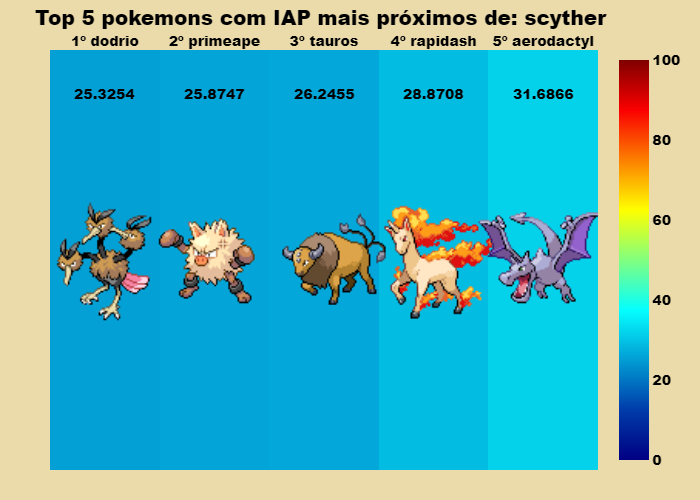

In [344]:
plot_graphic(teste1[1], teste1[2], teste1[3])

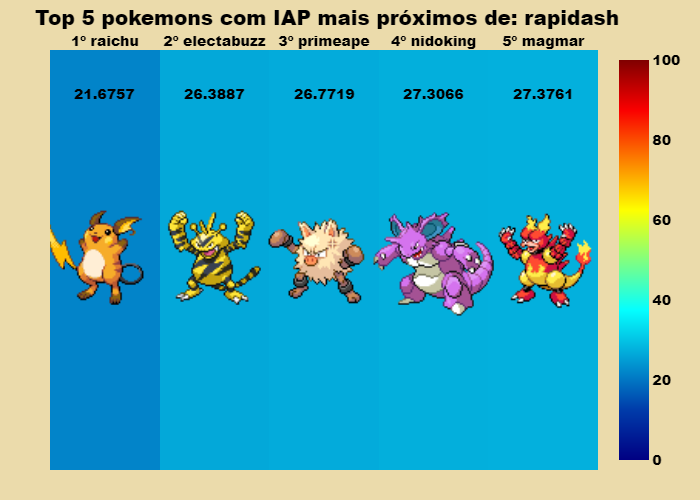

In [339]:
plot_graphic(teste2[1], teste2[2], teste2[3])

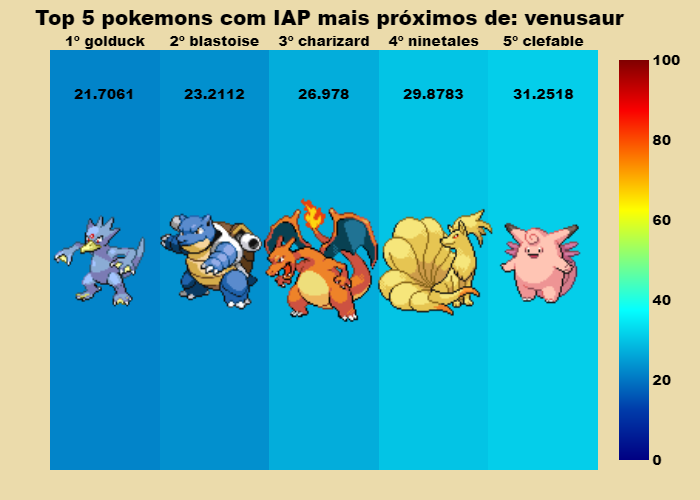

In [342]:
plot_graphic(teste3[1], teste3[2],teste3[3])

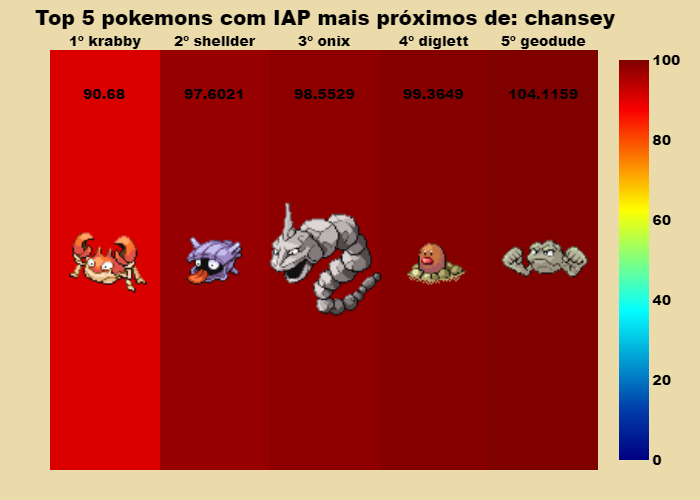

In [345]:
plot_graphic(most_excentric_dist[1], most_excentric_dist[2], most_excentric_dist[3])

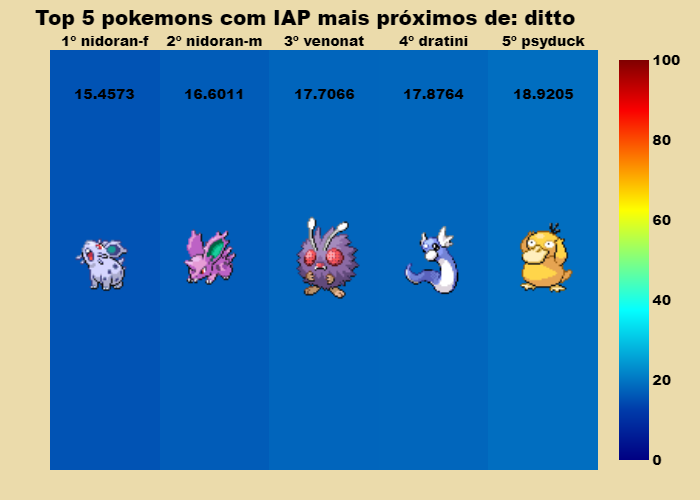

In [347]:
plot_graphic(most_generic_dist[1], most_generic_dist[2], most_generic_dist[3])